#### Decide churn label on the basis of recency

In [315]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [316]:
df = pd.read_csv('clv_data.csv')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113760 entries, 0 to 113759
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113760 non-null  object 
 1   customer_unique_id             113760 non-null  object 
 2   customer_zip_code_prefix       113760 non-null  int64  
 3   customer_city                  113760 non-null  object 
 4   customer_state                 113760 non-null  object 
 5   order_id                       113760 non-null  object 
 6   order_status                   113760 non-null  object 
 7   order_purchase_timestamp       113760 non-null  object 
 8   order_approved_at              113760 non-null  object 
 9   order_delivered_carrier_date   113760 non-null  object 
 10  order_delivered_customer_date  113760 non-null  object 
 11  order_estimated_delivery_date  113760 non-null  object 
 12  purchased_approved            

In [318]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
purchased_approved                    0
approved_carrier                      0
carrier_delivered                     0
delivered_estimated                   0
purchased_delivered                   0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0


#### Creating a target variable
##### Assumption of Inactivity: The approach assumes that customers who haven't made a purchase recently are more likely to churn.


In [319]:
# Assuming churn threshold as 180(also give reason why ?)
churn_threshold_days = 180
df['churn'] = (df['recency'] > churn_threshold_days).astype(int)

In [320]:
df['churn'].value_counts(normalize=True)*100

1    59.690577
0    40.309423
Name: churn, dtype: float64

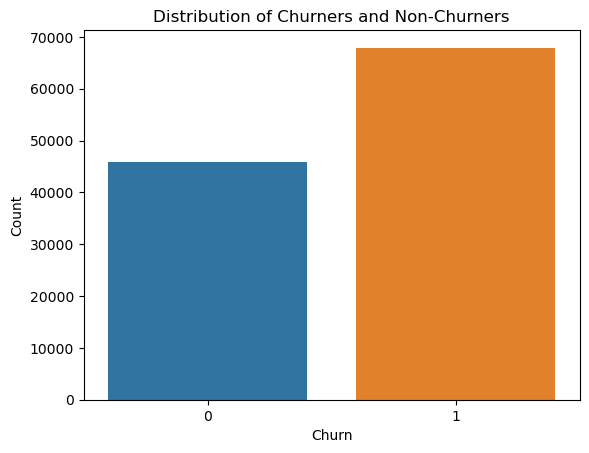

In [321]:
# Visualize the churn segmentation
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churners and Non-Churners')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


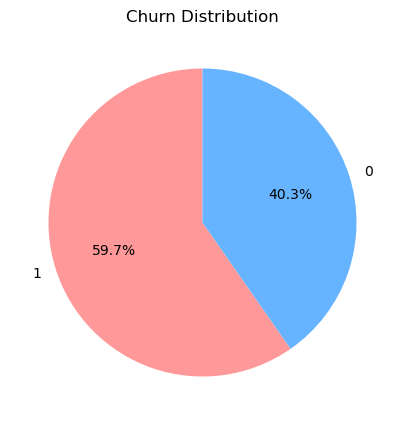

In [322]:
churn_counts = df['churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Churn Distribution')
plt.show()

In [323]:
df['churn'].dtype

dtype('int32')

### Droping unnescessary features

In [324]:
# Drop unnecessary features
unnecessary_features = [
    'customer_id','customer_unique_id','customer_city',
    'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 'carrier_delivered',

    'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty','seller_city','seller_state',
    'geolocation_zip_code_prefix',
    'payment_sequential','purchased_approved','delivered_estimated','purchased_delivered',
    'seller_zip_code_prefix', 'payment_value',
    'product_category_name_english','product_category_name','customer_zip_code_prefix',
    'review_id', 'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp','late_deliveries'
]

# Drop unnecessary features from the DataFrame
final = df.drop(unnecessary_features, axis=1)


In [325]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113760 entries, 0 to 113759
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        113760 non-null  object 
 1   price                 113760 non-null  float64
 2   freight_value         113760 non-null  float64
 3   product_weight_g      113760 non-null  float64
 4   product_length_cm     113760 non-null  float64
 5   product_height_cm     113760 non-null  float64
 6   product_width_cm      113760 non-null  float64
 7   geolocation_lat       113760 non-null  float64
 8   geolocation_lng       113760 non-null  float64
 9   payment_type          113760 non-null  object 
 10  payment_installments  113760 non-null  int64  
 11  review_score          112912 non-null  float64
 12  recency               113760 non-null  int64  
 13  frequency             113760 non-null  int64  
 14  monetary_value        113760 non-null  float64
 15  

In [326]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4.0,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1.0,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1.0,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3.0,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4.0,206,1,137.58,0,1,1


In [327]:
final['review_score'].unique()

array([ 4.,  1.,  3.,  2.,  5., nan])

In [328]:
final['review_score'].value_counts()

5.0    64981
4.0    21756
1.0    12832
3.0     9512
2.0     3831
Name: review_score, dtype: int64

In [329]:
final.isna().sum() / len(final) * 100

customer_state          0.000000
price                   0.000000
freight_value           0.000000
product_weight_g        0.000000
product_length_cm       0.000000
product_height_cm       0.000000
product_width_cm        0.000000
geolocation_lat         0.000000
geolocation_lng         0.000000
payment_type            0.000000
payment_installments    0.000000
review_score            0.745429
recency                 0.000000
frequency               0.000000
monetary_value          0.000000
customer_tenure         0.000000
num_orders              0.000000
churn                   0.000000
dtype: float64

#### Observation:
Since most(~90%) of the review_score are null, dropping them

### Treating null values in review_score

In [330]:
mean_score = int(final['review_score'].fillna(0).mean())
mean_score

4

In [331]:
final['review_score'] = df['review_score'].fillna(mean_score).astype(int)

In [332]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4,206,1,137.58,0,1,1


In [333]:
final.isna().sum()

customer_state          0
price                   0
freight_value           0
product_weight_g        0
product_length_cm       0
product_height_cm       0
product_width_cm        0
geolocation_lat         0
geolocation_lng         0
payment_type            0
payment_installments    0
review_score            0
recency                 0
frequency               0
monetary_value          0
customer_tenure         0
num_orders              0
churn                   0
dtype: int64

In [334]:
final.shape

(113760, 18)

In [335]:
final.duplicated().sum()

12965

In [336]:
final = final.drop_duplicates()
final.shape

(100795, 18)

#### Outliers treatment:

In [337]:
print(final.describe())

               price  freight_value  product_weight_g  product_length_cm  \
count  100795.000000  100795.000000     100795.000000      100795.000000   
mean      123.963171      20.123662       2095.881681          30.164562   
std       187.732667      15.805478       3743.952313          16.104948   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.800000      13.160000        300.000000          18.000000   
50%        78.000000      16.360000        700.000000          25.000000   
75%       139.000000      21.260000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count      100795.000000     100795.000000    100795.000000    100795.000000   
mean           16.416241         23.099846       -21.139621       -46.126808   
std            13.297973         11.745547         5.669582         4.09421

In [338]:
# Identify outliers using z-score
from scipy import stats
print(f'Number of rows before filtering outliers : {len(final)}')

filtered_entries = np.array ([True] * len(final))

for col in ['recency', 'frequency', 'monetary_value', 'customer_tenure', 'freight_value','price','num_orders',\
            'product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_installments',\
           'geolocation_lat','geolocation_lng']:
  zscore = abs(stats.zscore(final[col]))
  filtered_entries = (zscore < 3)

final = final[filtered_entries]
print(f'Number of rows after filtering outlier : {len(final)}')


Number of rows before filtering outliers : 100795
Number of rows after filtering outlier : 100179


In [339]:
print(final.describe())

               price  freight_value  product_weight_g  product_length_cm  \
count  100179.000000  100179.000000     100179.000000      100179.000000   
mean      123.710915      20.013576       2095.585462          30.170854   
std       187.322199      15.686786       3741.849061          16.110140   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.600000      13.120000        300.000000          18.000000   
50%        78.000000      16.320000        700.000000          25.000000   
75%       139.000000      21.150000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count      100179.000000     100179.000000    100179.000000    100179.000000   
mean           16.417553         23.101898       -21.230594       -46.038654   
std            13.301016         11.744247         5.517036         3.86759

#### Observation:
since most of the customers are one timers, and std of num_orders is almost 0, dropping both the features as they
won't add any values in model trianing

In [340]:
final.drop(columns = ['num_orders', 'frequency'], axis = 1, inplace = True)

### Creating a new df for model 

In [341]:
model_df = final.copy()
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4,469,146.87,0,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,551.58,0,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3,478,140.61,0,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4,206,137.58,0,1
5,SC,126.99,15.06,8683.0,54.0,64.0,31.0,-27.563095,-48.983780,credit_card,5,4,523,142.05,0,1


### Target Imbalance:

In [342]:
class_distribution = model_df['churn'].value_counts()
print(class_distribution)

1    59557
0    40622
Name: churn, dtype: int64


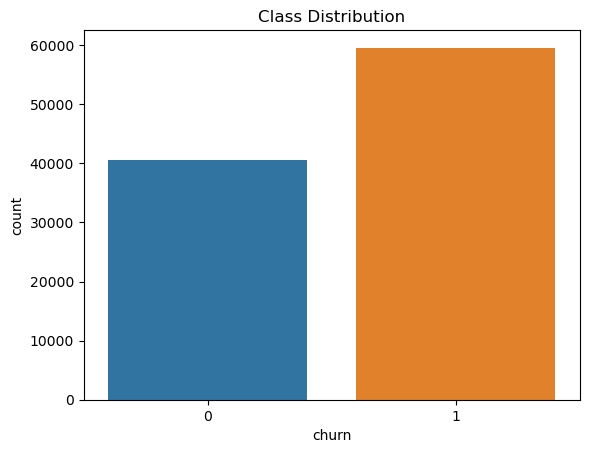

In [343]:
sns.countplot(x='churn', data=model_df)
plt.title('Class Distribution')
plt.show()

#### Target is balanced. 

In [344]:
from sklearn.preprocessing import PowerTransformer

# Select the columns to transform
columns_to_transform = [ 'geolocation_lat', 'geolocation_lng']

# Fit the PowerTransformer on the selected columns
pt = PowerTransformer(method='yeo-johnson')
model_df[columns_to_transform] = pt.fit_transform(model_df[columns_to_transform])


In [345]:
# Select the columns to transform
columns_to_transform_box_cox = [col for col in model_df.select_dtypes(include=np.number).\
                                columns if col not in [ 'geolocation_lat', 'geolocation_lng','churn','review_score']]

# Fit the PowerTransformer on the selected columns using Box-Cox method
pt_box_cox = PowerTransformer(method='box-cox')
model_df[columns_to_transform_box_cox] = pt_box_cox.fit_transform(0.001 + model_df[columns_to_transform_box_cox])

#### Observation:

1. The variables which have negative values are transformed using yeo-johnson method, as log of 0 or negative values would return infinite value.
2. The variables which has only positive values in it are transformed using box-cox method.

#### Data Transformation

In [346]:
def state_encoding(state):
    if state in ['RS', 'SC', 'PR']:
        return 'southern'
    elif state in ['SP', 'RJ', 'MG', 'ES']:
        return 'southeastern'
    elif state in ['MT', 'MS', 'GO', 'DF']:
        return 'centralwestern'
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return 'northeastern'
    else: 
        return 'northern'

In [347]:
model_df['customer_state'] = model_df['customer_state'].apply(state_encoding)

#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

In [348]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,southeastern,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,credit_card,0.085549,4,1.351269,0.231236,-0.218103,1
1,northern,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,credit_card,-0.909181,1,0.476697,1.415916,-0.218103,1
3,southern,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,credit_card,1.451582,3,1.391604,0.185254,-0.218103,1
4,southeastern,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,credit_card,1.758923,4,-0.044579,0.162070,-0.218103,1
5,southern,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,credit_card,1.131397,4,1.588369,0.196054,-0.218103,1


#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

In [349]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100179 entries, 0 to 113759
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        100179 non-null  object 
 1   price                 100179 non-null  float64
 2   freight_value         100179 non-null  float64
 3   product_weight_g      100179 non-null  float64
 4   product_length_cm     100179 non-null  float64
 5   product_height_cm     100179 non-null  float64
 6   product_width_cm      100179 non-null  float64
 7   geolocation_lat       100179 non-null  float64
 8   geolocation_lng       100179 non-null  float64
 9   payment_type          100179 non-null  object 
 10  payment_installments  100179 non-null  float64
 11  review_score          100179 non-null  int32  
 12  recency               100179 non-null  float64
 13  monetary_value        100179 non-null  float64
 14  customer_tenure       100179 non-null  float64
 15  

### Label encoding

#### feature transformation

In [350]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding for columns
for col in ['customer_state', 'payment_type']:
    model_df[col] = label_encoder.fit_transform(model_df[col])

In [351]:
# Pair Plots (Numeric)
#sns.pairplot(model_df, diag_kind='kde', hue='churn')

In [352]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,1.351269,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,0.476697,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,1.391604,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,-0.044579,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,1.588369,0.196054,-0.218103,1


#### Now, to see which number associated with which label

#### To determine the importance of features for predicting churn
This fits a Random Forest classifier on the data, extracts feature importances, and then displays them in a DataFrame. Features with higher importance values are considered more influential in predicting churn.

In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = model_df.drop('churn', axis=1)
y = model_df['churn']


In [354]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [355]:

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [356]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [357]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [358]:
# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [359]:
# Display the feature importances
print(importances_df)

                 Feature  Importance
12               recency    0.912569
2          freight_value    0.045094
3       product_weight_g    0.006054
7        geolocation_lat    0.005695
1                  price    0.005170
13        monetary_value    0.005141
8        geolocation_lng    0.004458
6       product_width_cm    0.003770
4      product_length_cm    0.003602
5      product_height_cm    0.003186
0         customer_state    0.002808
10  payment_installments    0.001182
11          review_score    0.000679
9           payment_type    0.000410
14       customer_tenure    0.000182


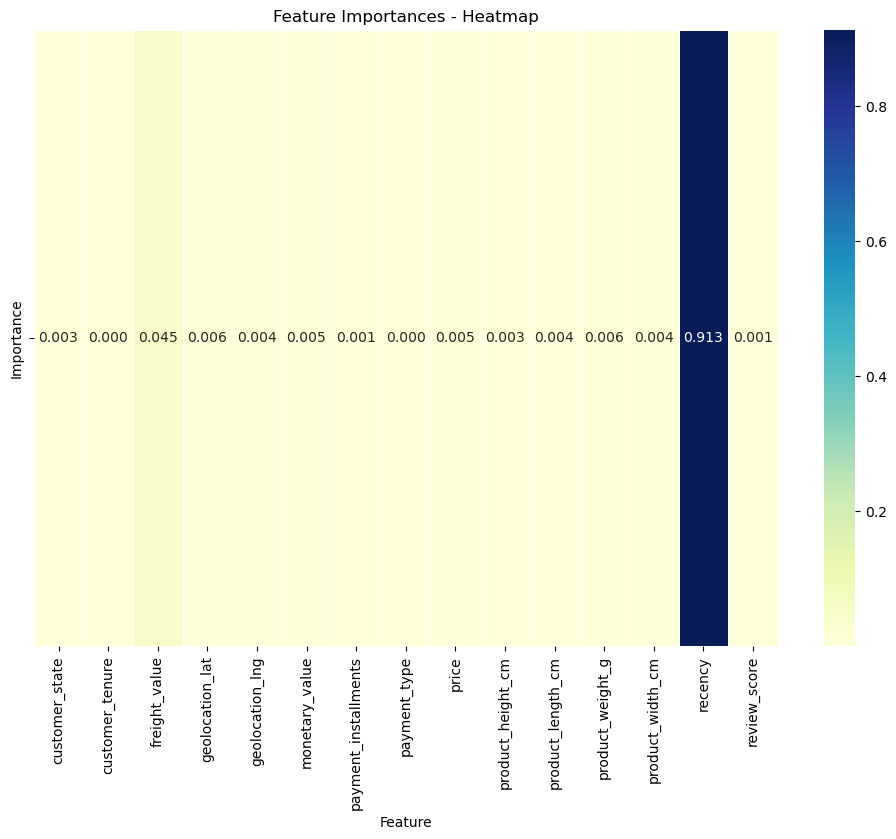

In [360]:
import seaborn as sns

# Increase figure size
plt.figure(figsize=(12, 8))

# Plotting a seaborn heatmap with numbers
sns.heatmap(importances_df.pivot_table(index='Feature', values='Importance').T,
            cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)

plt.title('Feature Importances - Heatmap')
plt.show()



#### Importance of features: correlation:

In [361]:
correlation_matrix = model_df.corr()
correlation_with_churn = correlation_matrix['churn'].abs().sort_values(ascending=False)


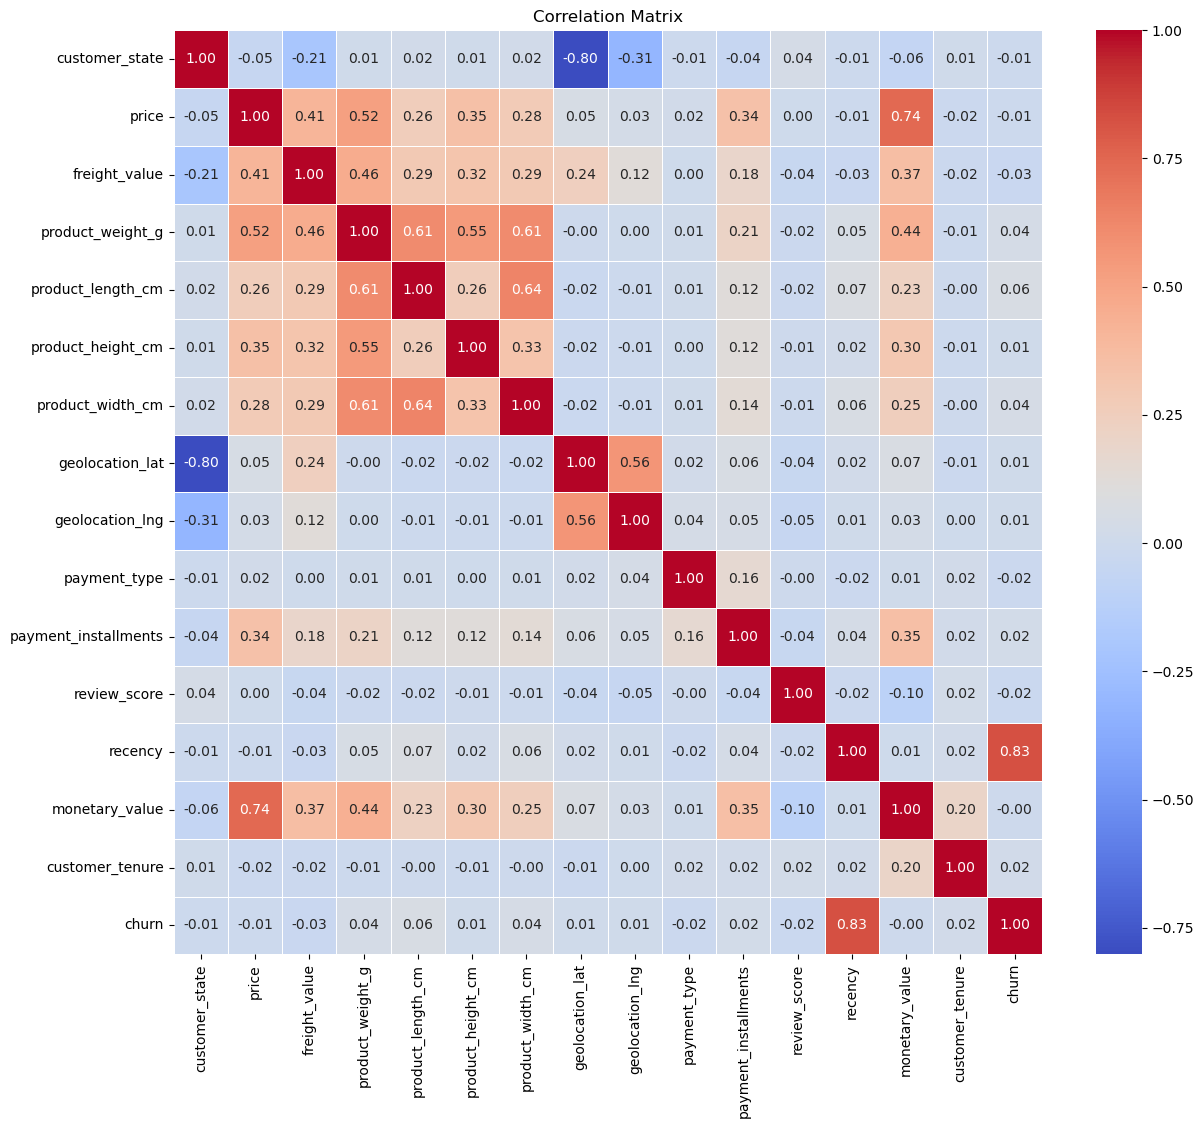

In [362]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



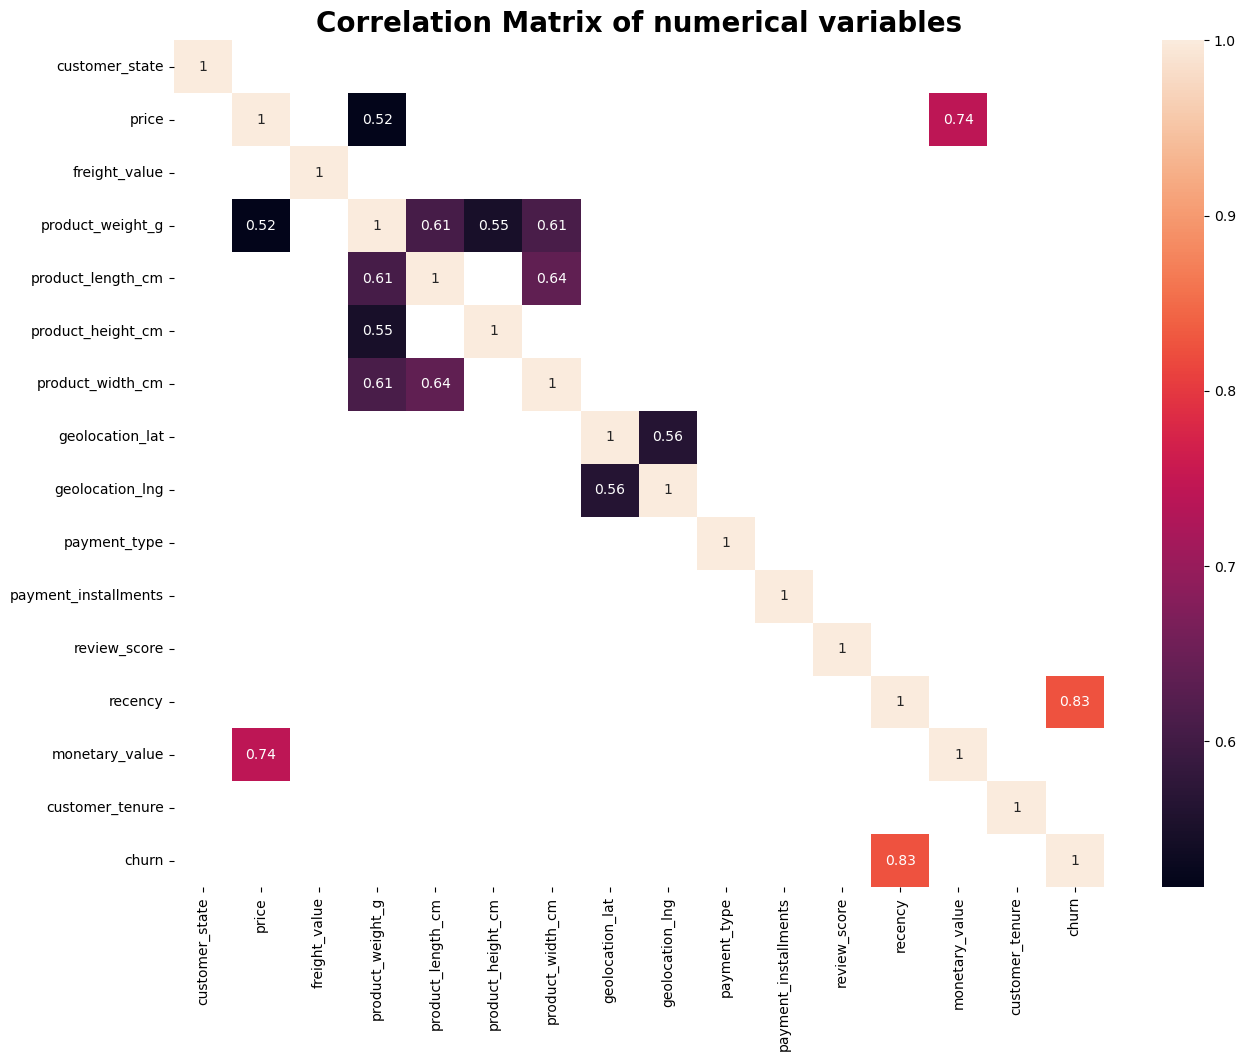

In [363]:
plt.figure(figsize=(15,11))
sns.heatmap(model_df.corr()[model_df.corr() > 0.5], annot = True)
plt.title('Correlation Matrix of numerical variables',fontsize=20,fontweight='bold')
plt.show()

In [364]:
#model_df = final[['recency','frequency','monetary_value','price','freight_value','review_score','churn']]
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,1.351269,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,0.476697,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,1.391604,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,-0.044579,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,1.588369,0.196054,-0.218103,1


#### Feature Transformation

In [365]:
from scipy.stats import skew, kurtosis

In [366]:
feature_trans = model_df.copy()
feature_normal = []
feature_not_normal = []

for i in feature_trans:
  skw = skew(model_df[i])
  kts = kurtosis(model_df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_not_normal.append(i)
  else:
    feature_not_normal.append(i)

print('Normal_distribution:', feature_normal)
print('Not_normal_distribution:', feature_not_normal)

Normal_distribution: ['customer_state', 'price', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'review_score', 'recency', 'monetary_value', 'churn']
Not_normal_distribution: ['freight_value', 'product_weight_g', 'payment_type', 'payment_installments', 'customer_tenure']


#### Model

In [367]:
#model_df['churn'] = final['churn'].astype(int)
#model_df['churn'] = model_df.churn.astype('int')

In [368]:
model_df['churn'].unique()

array([1, 0])

In [369]:
model_df.drop(columns = ['recency'], axis = 1, inplace = True)

In [370]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,0.196054,-0.218103,1


#### Observation:
The Recency feature is dropped for the model building, as it is used to create the target variable. 
Predictions would be 100% accurate if the Recency feature is not dropped, which would be a good model

In [371]:
from sklearn.model_selection import train_test_split
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [372]:
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 14)
y_train (80143,)
X_test (20036, 14)
y_test (20036,)


#### Statistically proving train & test are good representations of overall data.
#### A t-test independence on each column to show both have equal or similar representation.

#### Null Hypothesis, H0: Both sets have same mean, thus they have equal representation.
#### Alternate Hypothesis, Ha: Both sets have unequal means, thus unequal representation.

### Check here and remove if necessary

In [373]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

#### Observation:
As all the columns have p-values greater than significance level of 0.05, we do not reject the null hypothesis 
and we can conclude that all independent features are properly represented both in train and test sets.

### Logit Regression

In [374]:
import statsmodels.api as smo

logreg = smo.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.670436
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                80143
Model:                          Logit   Df Residuals:                    80129
Method:                           MLE   Df Model:                           13
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                0.005758
Time:                        18:34:34   Log-Likelihood:                -53731.
converged:                       True   LL-Null:                       -54042.
Covariance Type:            nonrobust   LLR p-value:                1.293e-124
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
customer_state           0.1469      0.008     18.934      0.000       0.132       0.162

In [375]:
print('Akaike information criterion (AIC):', logreg.aic)

Akaike information criterion (AIC): 107489.49073819628


#### The AIC gives a trade-off between the model accuracy and model complexity, i.e., it prevents from overfitting.

In [376]:
logreg.params

customer_state          0.146865
price                  -0.073586
freight_value          -0.137351
product_weight_g        0.069305
product_length_cm       0.102141
product_height_cm       0.009852
product_width_cm        0.036983
geolocation_lat         0.201944
geolocation_lng        -0.031805
payment_type           -0.030574
payment_installments    0.069775
review_score           -0.000029
monetary_value          0.000506
customer_tenure         0.028829
dtype: float64

In [377]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
customer_state,1.158198
price,0.929056
freight_value,0.871664
product_weight_g,1.071763
product_length_cm,1.107540
product_height_cm,1.009901
product_width_cm,1.037675
geolocation_lat,1.223780
geolocation_lng,0.968695
payment_type,0.969889


In [378]:
#train set
y_pred_prob_train = logreg.predict(X_train)
y_pred_train = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]

In [379]:
#test set
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

18219     0.655778
104481    0.579129
37576     0.608063
45674     0.707836
22199     0.619541
dtype: float64

In [380]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]


[1, 1, 1, 1, 1]

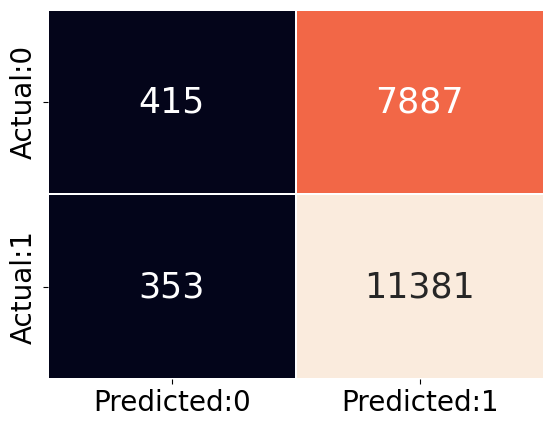

In [381]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [382]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.54      0.05      0.09      8302
           1       0.59      0.97      0.73     11734

    accuracy                           0.59     20036
   macro avg       0.57      0.51      0.41     20036
weighted avg       0.57      0.59      0.47     20036



In [383]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)



kappa value: 0.022950235706364785


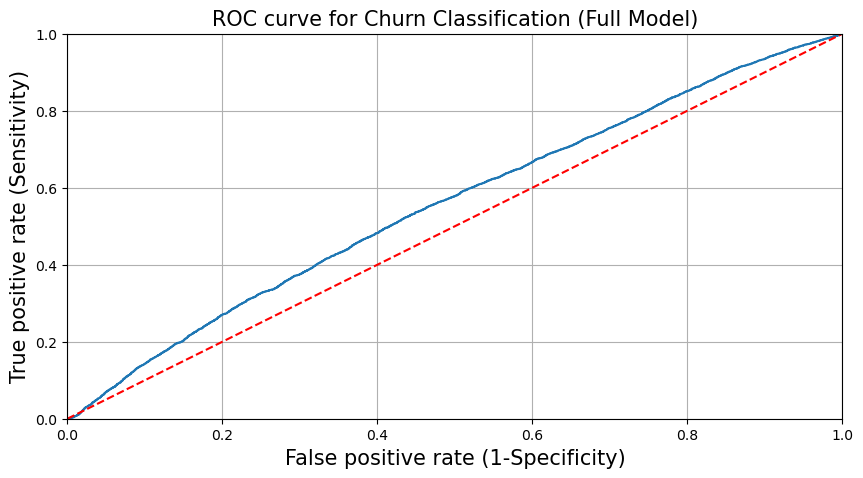

In [384]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Classification (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Decision Tree model¶

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 14)
y_train (80143,)
X_test (20036, 14)
y_test (20036,)


In [386]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [387]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)

In [388]:
ypred_proba_dt = decisionTree.predict(X_test)

In [389]:
ypred_dt = [0 if i < 0.5 else 1 for i in ypred_proba_dt]
ypred_dt[:10]

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1]

In [390]:
ypred_proba_dt_train = decisionTree.predict(X_train)
ypred_dt_train = [0 if i < 0.5 else 1 for i in ypred_proba_dt_train]

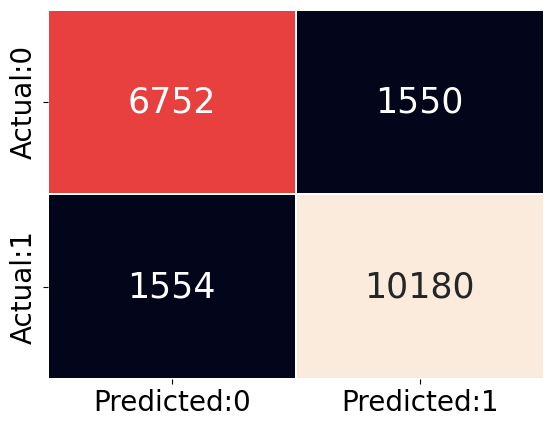

In [391]:
cm = confusion_matrix(y_test, ypred_dt)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [392]:
print(classification_report(y_test, ypred_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8302
           1       0.87      0.87      0.87     11734

    accuracy                           0.85     20036
   macro avg       0.84      0.84      0.84     20036
weighted avg       0.85      0.85      0.85     20036



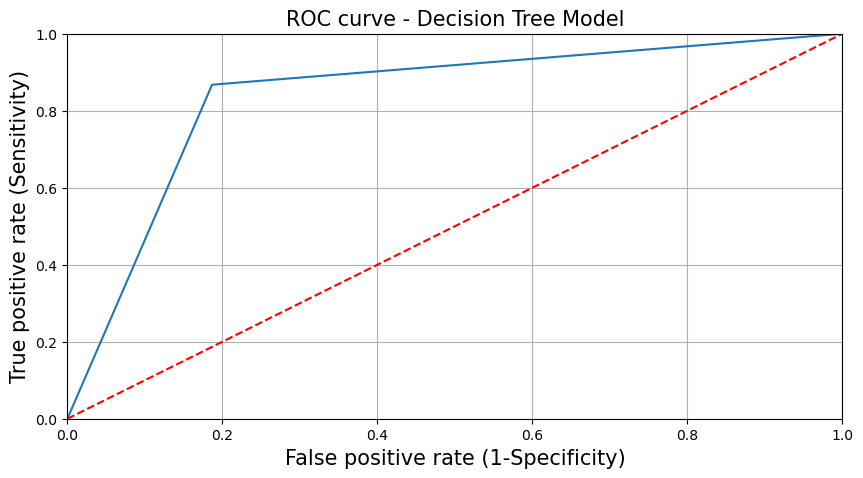

In [393]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Decision Tree Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

###  XG Boost Model¶

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 14)
y_train (80143,)
X_test (20036, 14)
y_test (20036,)


In [395]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [396]:
from xgboost import XGBClassifier
xgBoost = XGBClassifier()
xbBoost = xgBoost.fit(X_train, y_train)

In [397]:
ypred_proba_xg = xgBoost.predict(X_test)

In [398]:
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [399]:
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]

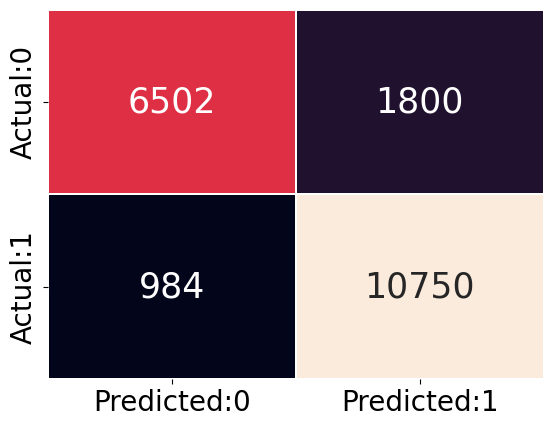

In [400]:
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [401]:
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8302
           1       0.86      0.92      0.89     11734

    accuracy                           0.86     20036
   macro avg       0.86      0.85      0.85     20036
weighted avg       0.86      0.86      0.86     20036



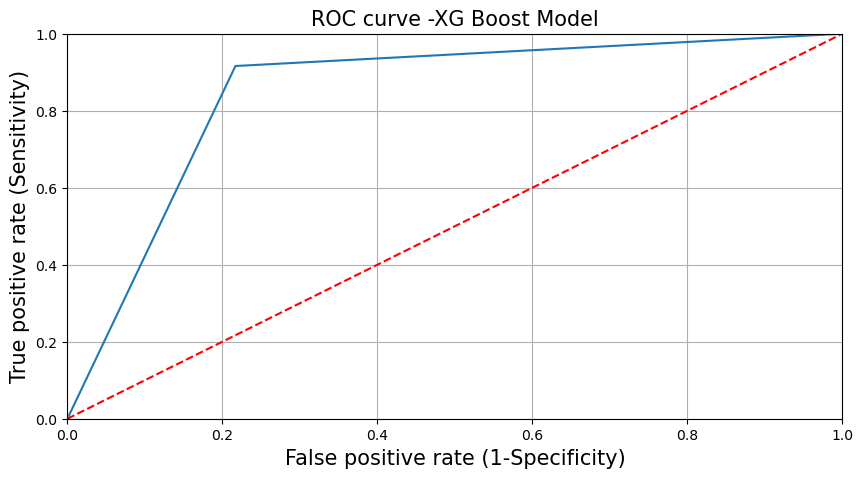

In [402]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -XG Boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Random Forest Classifier¶

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (80143, 14)
ytrain:  (80143,)
xtest:  (20036, 14)
ytest:  (20036,)


In [404]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [405]:
rand = RandomForestClassifier()
rand_model = rand.fit(X_train,y_train)

In [406]:
ypred_proba_random = rand_model.predict(X_test)

In [407]:
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

In [408]:
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

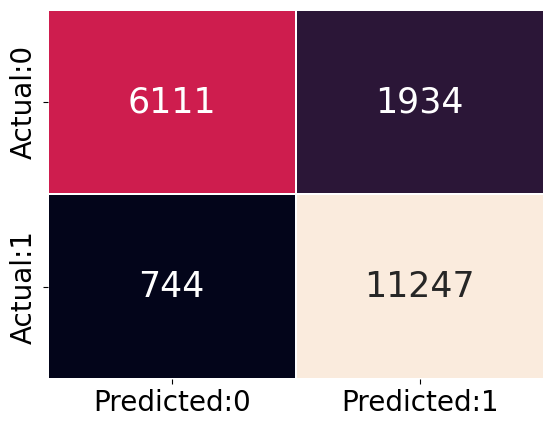

In [409]:
cm = confusion_matrix(y_test, ypred_random)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [410]:
print(classification_report(y_test, ypred_random))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8045
           1       0.85      0.94      0.89     11991

    accuracy                           0.87     20036
   macro avg       0.87      0.85      0.86     20036
weighted avg       0.87      0.87      0.86     20036



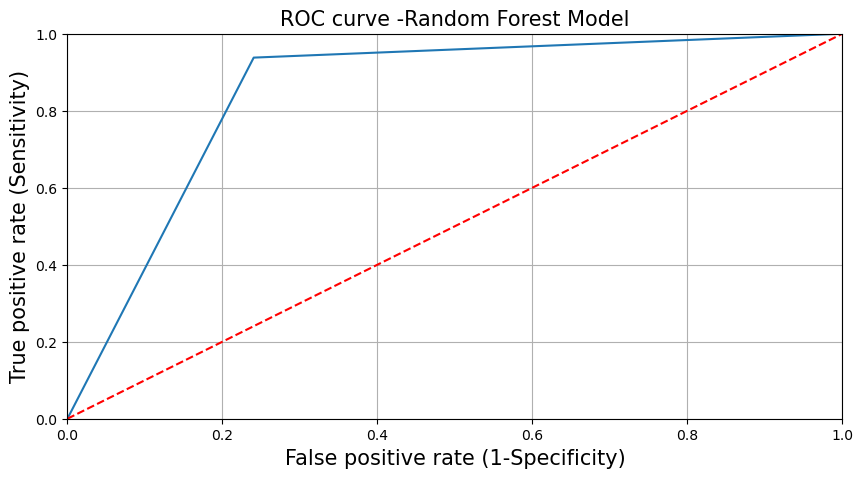

In [411]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -Random Forest Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Logistic Regression

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (80143, 14)
ytrain:  (80143,)
xtest:  (20036, 14)
ytest:  (20036,)


In [413]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [414]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)

In [415]:
ypred_proba_log = lr_model.predict(X_test)
ypred_log = [0 if i < 0.5 else 1 for i in ypred_proba_log]
ypred_log[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [416]:
ypred_proba_log_train = lr_model.predict(X_train)
ypred_log_train = [0 if i < 0.5 else 1 for i in ypred_proba_log_train]

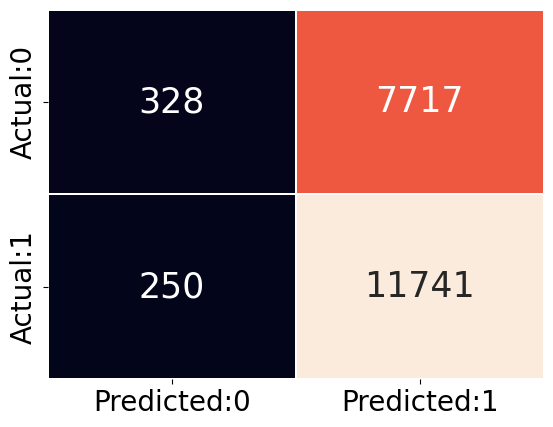

In [417]:
cm = confusion_matrix(y_test, ypred_log)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [418]:
print(classification_report(y_test, ypred_log))



              precision    recall  f1-score   support

           0       0.57      0.04      0.08      8045
           1       0.60      0.98      0.75     11991

    accuracy                           0.60     20036
   macro avg       0.59      0.51      0.41     20036
weighted avg       0.59      0.60      0.48     20036



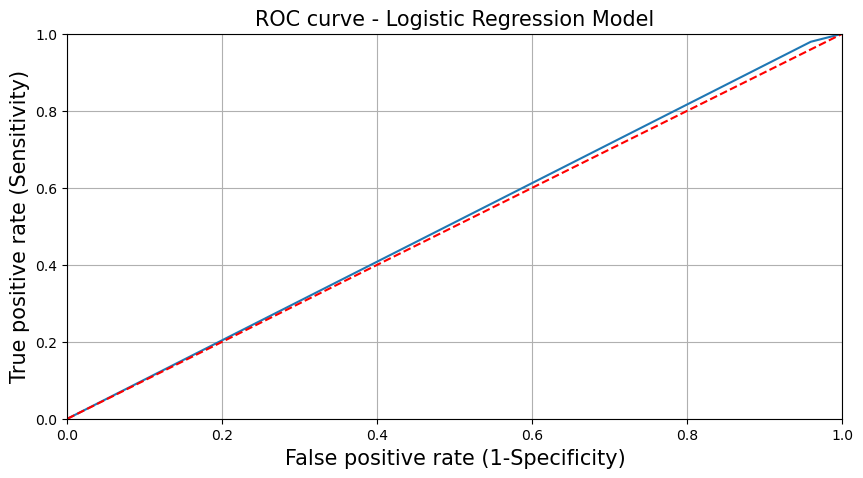

In [419]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_log)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Logistic Regression Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)


### Observation:
1. Logistic Regression:

    Accuracy: 60%
    Precision (churn=1): 60%
    Recall (churn=1): 98%
    F1-score (churn=1): 74%

Insights:

    Low precision for churn=1 suggests that there are false positives.
    High recall for churn=1 indicates the model is good at capturing actual churn cases.

2. Decision Tree model:

    Accuracy: 84%
    Precision (churn=1): 87%
    Recall (churn=1): 86%
    F1-score (churn=1): 87%

Insights:

    Balanced precision and recall for churn=1.
    Good overall performance.

3. XGBoost:

    Accuracy: 86%
    Precision (churn=1): 86%
    Recall (churn=1): 92%
    F1-score (churn=1): 89%

Insights:

    Good precision and recall for churn=1.
    Overall high performance.

4. Random Forest:

    Accuracy: 87%
    Precision (churn=1): 86%
    Recall (churn=1): 93%
    F1-score (churn=1): 89%

Insights:

    Similar performance to XGBoost, with high precision and recall for churn=1.
    
    

From above observation, its clear that XG boost and Random forest are the best performing models. Now we will do Feature Importance Analysis:

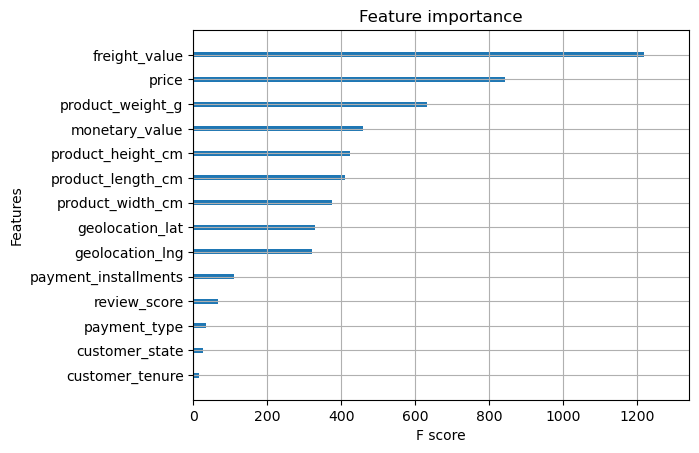

Top 10 important features: ['freight_value', 'price', 'product_weight_g', 'monetary_value', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'payment_installments']


In [420]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Assuming xgBoost is your trained XGBoost model
xgBoost = XGBClassifier()
xgBoost.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgBoost, importance_type='weight', show_values=False)
plt.show()

# Extract the top N important features
top_n = 10  # Specify the number of top features you want to consider
important_features_xgboost = xgBoost.get_booster().get_score(importance_type='weight')
important_features_xgboost = sorted(important_features_xgboost.items(), key=lambda x: x[1], reverse=True)[:top_n]
important_features_xgboost = [feature[0] for feature in important_features_xgboost]

print("Top", top_n, "important features:", important_features_xgboost)


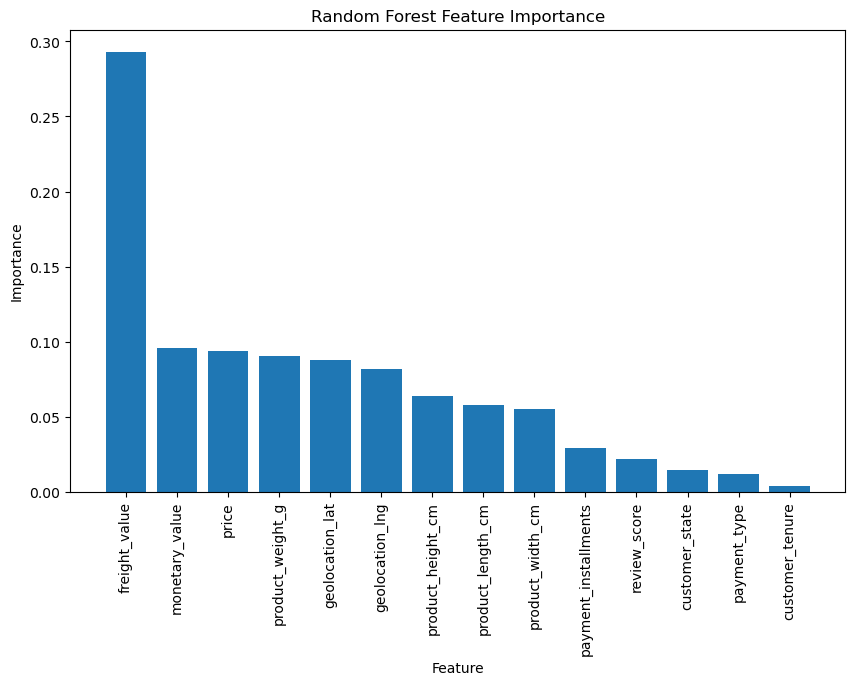

Top 10 important features: ['freight_value', 'monetary_value', 'price', 'product_weight_g', 'geolocation_lat', 'geolocation_lng', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'payment_installments']


In [421]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming rand is your trained RandomForestClassifier model
rand = RandomForestClassifier()
rand_model = rand.fit(X_train, y_train)

# Plot feature importance
feature_importance = rand_model.feature_importances_
features = X_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Specify the number of top features you want to consider (e.g., top 10)
top_n = 10

# Get the top N important features
important_features_rf = [features[i] for i in sorted_idx[:top_n]]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importance_rf[sorted_idx], align="center")
plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

print("Top", top_n, "important features:", important_features_rf)



### Hypermeter tuning

#### XG boost

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_xgboost], y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 10)
y_train (80143,)
X_test (20036, 10)
y_test (20036,)


In [423]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgBoost = XGBClassifier(random_state = 10)

In [424]:
# Define hyperparameter grid for fine-tuning
parameters = [
    {'n_estimators': [30, 40, 50, 70, 90],
     'max_depth': range(2, 7),
     'learning_rate': [0.1, 0.2, 0.4, 0.5]}]

In [425]:
# Create a GridSearchCV object for XGBoost
gcv_xgb = GridSearchCV(estimator=xgBoost, param_grid=parameters, cv=5)
gcv_xgb.fit(X_train, y_train)
            
# Print the best parameters
print("Best Parameters for XGBoost:", gcv_xgb.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 90}


In [426]:
# Initialize XGBoost classifier with best parameters
xgBoost = XGBClassifier(learning_rate=0.5, max_depth=6, n_estimators=90)
xgBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [427]:
# Predictions on the test set
ypred_proba_xg = xgBoost.predict(X_test)
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [428]:
# Predictions on the training set
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]


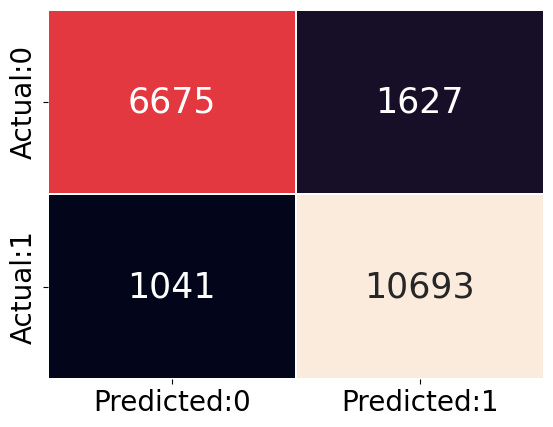

In [429]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [430]:
# Classification Report
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      8302
           1       0.87      0.91      0.89     11734

    accuracy                           0.87     20036
   macro avg       0.87      0.86      0.86     20036
weighted avg       0.87      0.87      0.87     20036



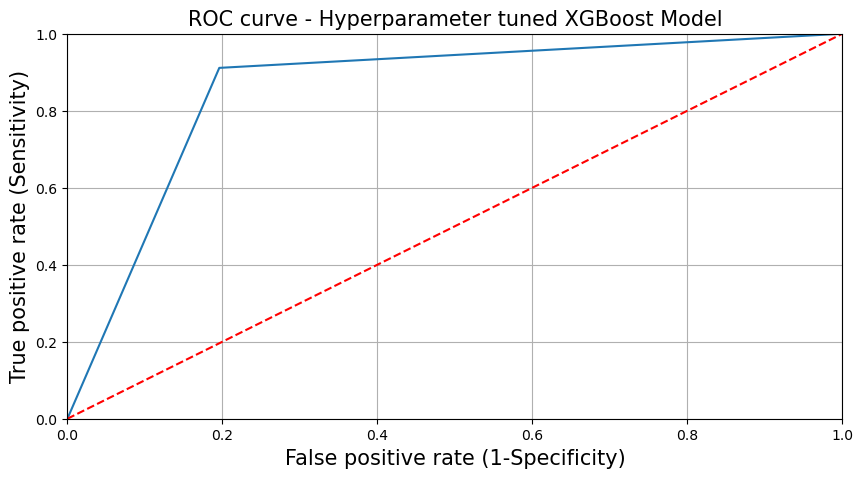

In [431]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned XGBoost Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.grid(True)
plt.show()

### Random Forest

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_rf], y, test_size=0.2, random_state=500)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)


X_train:  (80143, 10)
y_train:  (80143,)
X_test:  (20036, 10)
y_test:  (20036,)


In [433]:
# Initialize RandomForest classifier
rand = RandomForestClassifier(random_state=10)

# Define hyperparameter grid for fine-tuning
parameters = [
    {'criterion': ['gini', 'entropy'],
     'max_features': ['sqrt', 'log2'],
     'max_depth': range(2, 7),
     'min_samples_split': range(2, 7),
     'max_leaf_nodes': range(2, 10)}
]

In [434]:
# Create a GridSearchCV object for RandomForest
gcv_rf = GridSearchCV(estimator=rand, param_grid=parameters, cv=5,n_jobs=8)
gcv_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Random Forest:", gcv_rf.best_params_)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_split': 2}


In [441]:
# Initialize RandomForest classifier with best parameters
rand = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', max_leaf_nodes=9, min_samples_split=2)
rand_model = rand.fit(X_train, y_train)


In [442]:
# Predictions on the test set
ypred_proba_random = rand_model.predict(X_test)
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1]

In [443]:
# Predictions on the training set
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

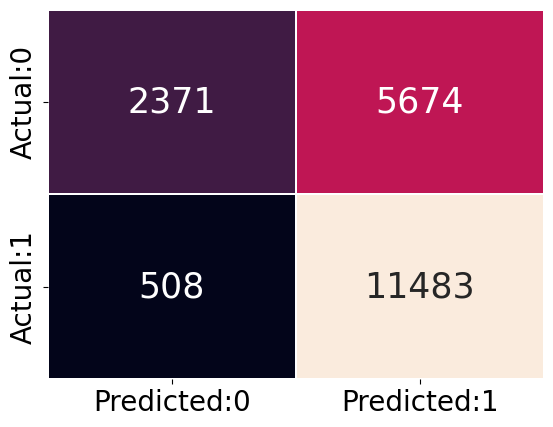

In [444]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_random)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [445]:

# Classification Report
print(classification_report(y_test, ypred_random))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43      8045
           1       0.67      0.96      0.79     11991

    accuracy                           0.69     20036
   macro avg       0.75      0.63      0.61     20036
weighted avg       0.73      0.69      0.65     20036



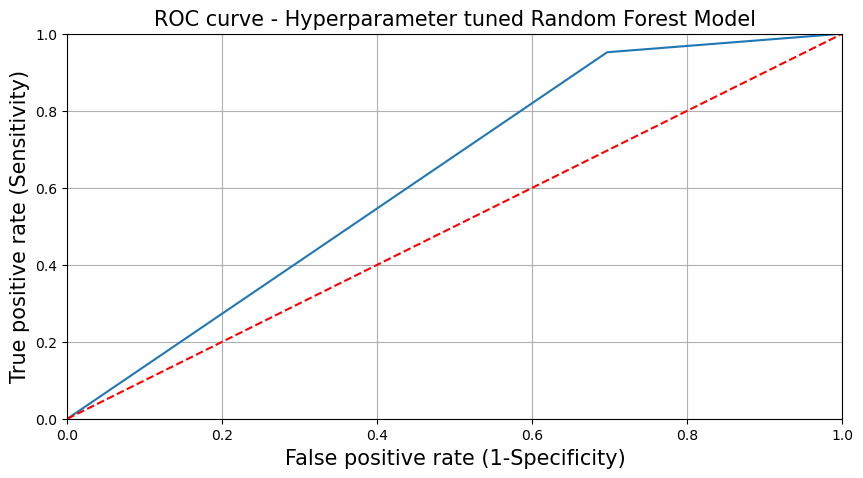

In [440]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned Random Forest Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.grid(True)
plt.show()

### Model Interpretation

### XG boost is performing better than random forest. 